In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

plt.rcParams['figure.dpi'] = 300

In [4]:
# PATHOGENS=["abaumannii", "calbicans", "campylobacter", "ecoli", "efaecium", "enterobacter", "hpylori", "kpneumoniae", "mtuberculosis", "ngonorrhoeae", "paeruginosa", "pfalciparum", "saureus", "smansoni", "spneumoniae"]
PATHOGENS = ['abaumannii']
PATH_TO_DATA = "../data"
PATH_TO_OUTPUT = '../output/03_baseline_models_toremove'
target = 'organism'

# chembl-antimicrobial-tasks repository needs to be cloned locally
PATH_TO_REPOSITORY = "/home/acomajuncosa/Documents/chembl-antimicrobial-tasks"

# Define Ersilia colors
ersilia_colors = ['#FAD782', '#FAA08B', '#DC9FDC', '#AA96FA', '#8DC7FA']
cc_colors = ["#EA5A49", "#B16BA8", "#5A72B5", "#7CAF2A", "#F39426"]

# Pathogen_mappings
pathogen_mappings = pd.read_csv(os.path.join(PATH_TO_REPOSITORY, "data", "pathogens.csv"))
pathogen_mappings = dict(zip(pathogen_mappings['pathogen_code'], pathogen_mappings['search_text']))

In [5]:
PATHOGEN_TO_RESULTS = {}

for pathogen in PATHOGENS:

    # Create a dict for each pathogen
    PATHOGEN_TO_RESULTS[pathogen] = {}

    # Load modelability
    MOD = pd.read_csv(os.path.join(PATH_TO_REPOSITORY, "output", f"{pathogen}_{target}", "018_selected_tasks_FINAL.csv"))
    task_to_MOD = {f"{i}_{l}": [j,k] for i,j,k,l in zip(MOD['task'], MOD['auroc_avg_MOD'], MOD['auroc_std_MOD'], MOD['SELECTED'])}

    # For each task
    for task in sorted(task_to_MOD):

        MOD = task_to_MOD[task]

        # Get NB Performances
        NB = open(os.path.join(PATH_TO_OUTPUT, f"{pathogen}_{target}", task, "NB_CV.csv"), "r").read().split(",")
        NB = np.array(NB).astype(float)
        NB = [np.mean(NB), np.std(NB)]

        # Get RF Performances
        RF = open(os.path.join(PATH_TO_OUTPUT, f"{pathogen}_{target}", task, "RF_CV.csv"), "r").read().split(",")
        RF = np.array(RF).astype(float)
        RF = [np.mean(RF), np.std(RF)]

        # # Get FLAML
        try:
            FLAML = open(os.path.join(PATH_TO_OUTPUT, f"{pathogen}_{target}", task, "FLAML_CV.csv"), "r").read().split(",")
            FLAML = np.array(FLAML).astype(float)
            FLAML = [np.mean(FLAML), np.std(FLAML)]
        except:
            FLAML = [0.5, 0.02]

        # Store results
        PATHOGEN_TO_RESULTS[pathogen][task] = [MOD, NB, RF, FLAML]

    break

In [6]:
def task_to_label(task, c):
    return f'task#{c} P{task.split("_")[0]}-S{task.split("_")[-1]}'

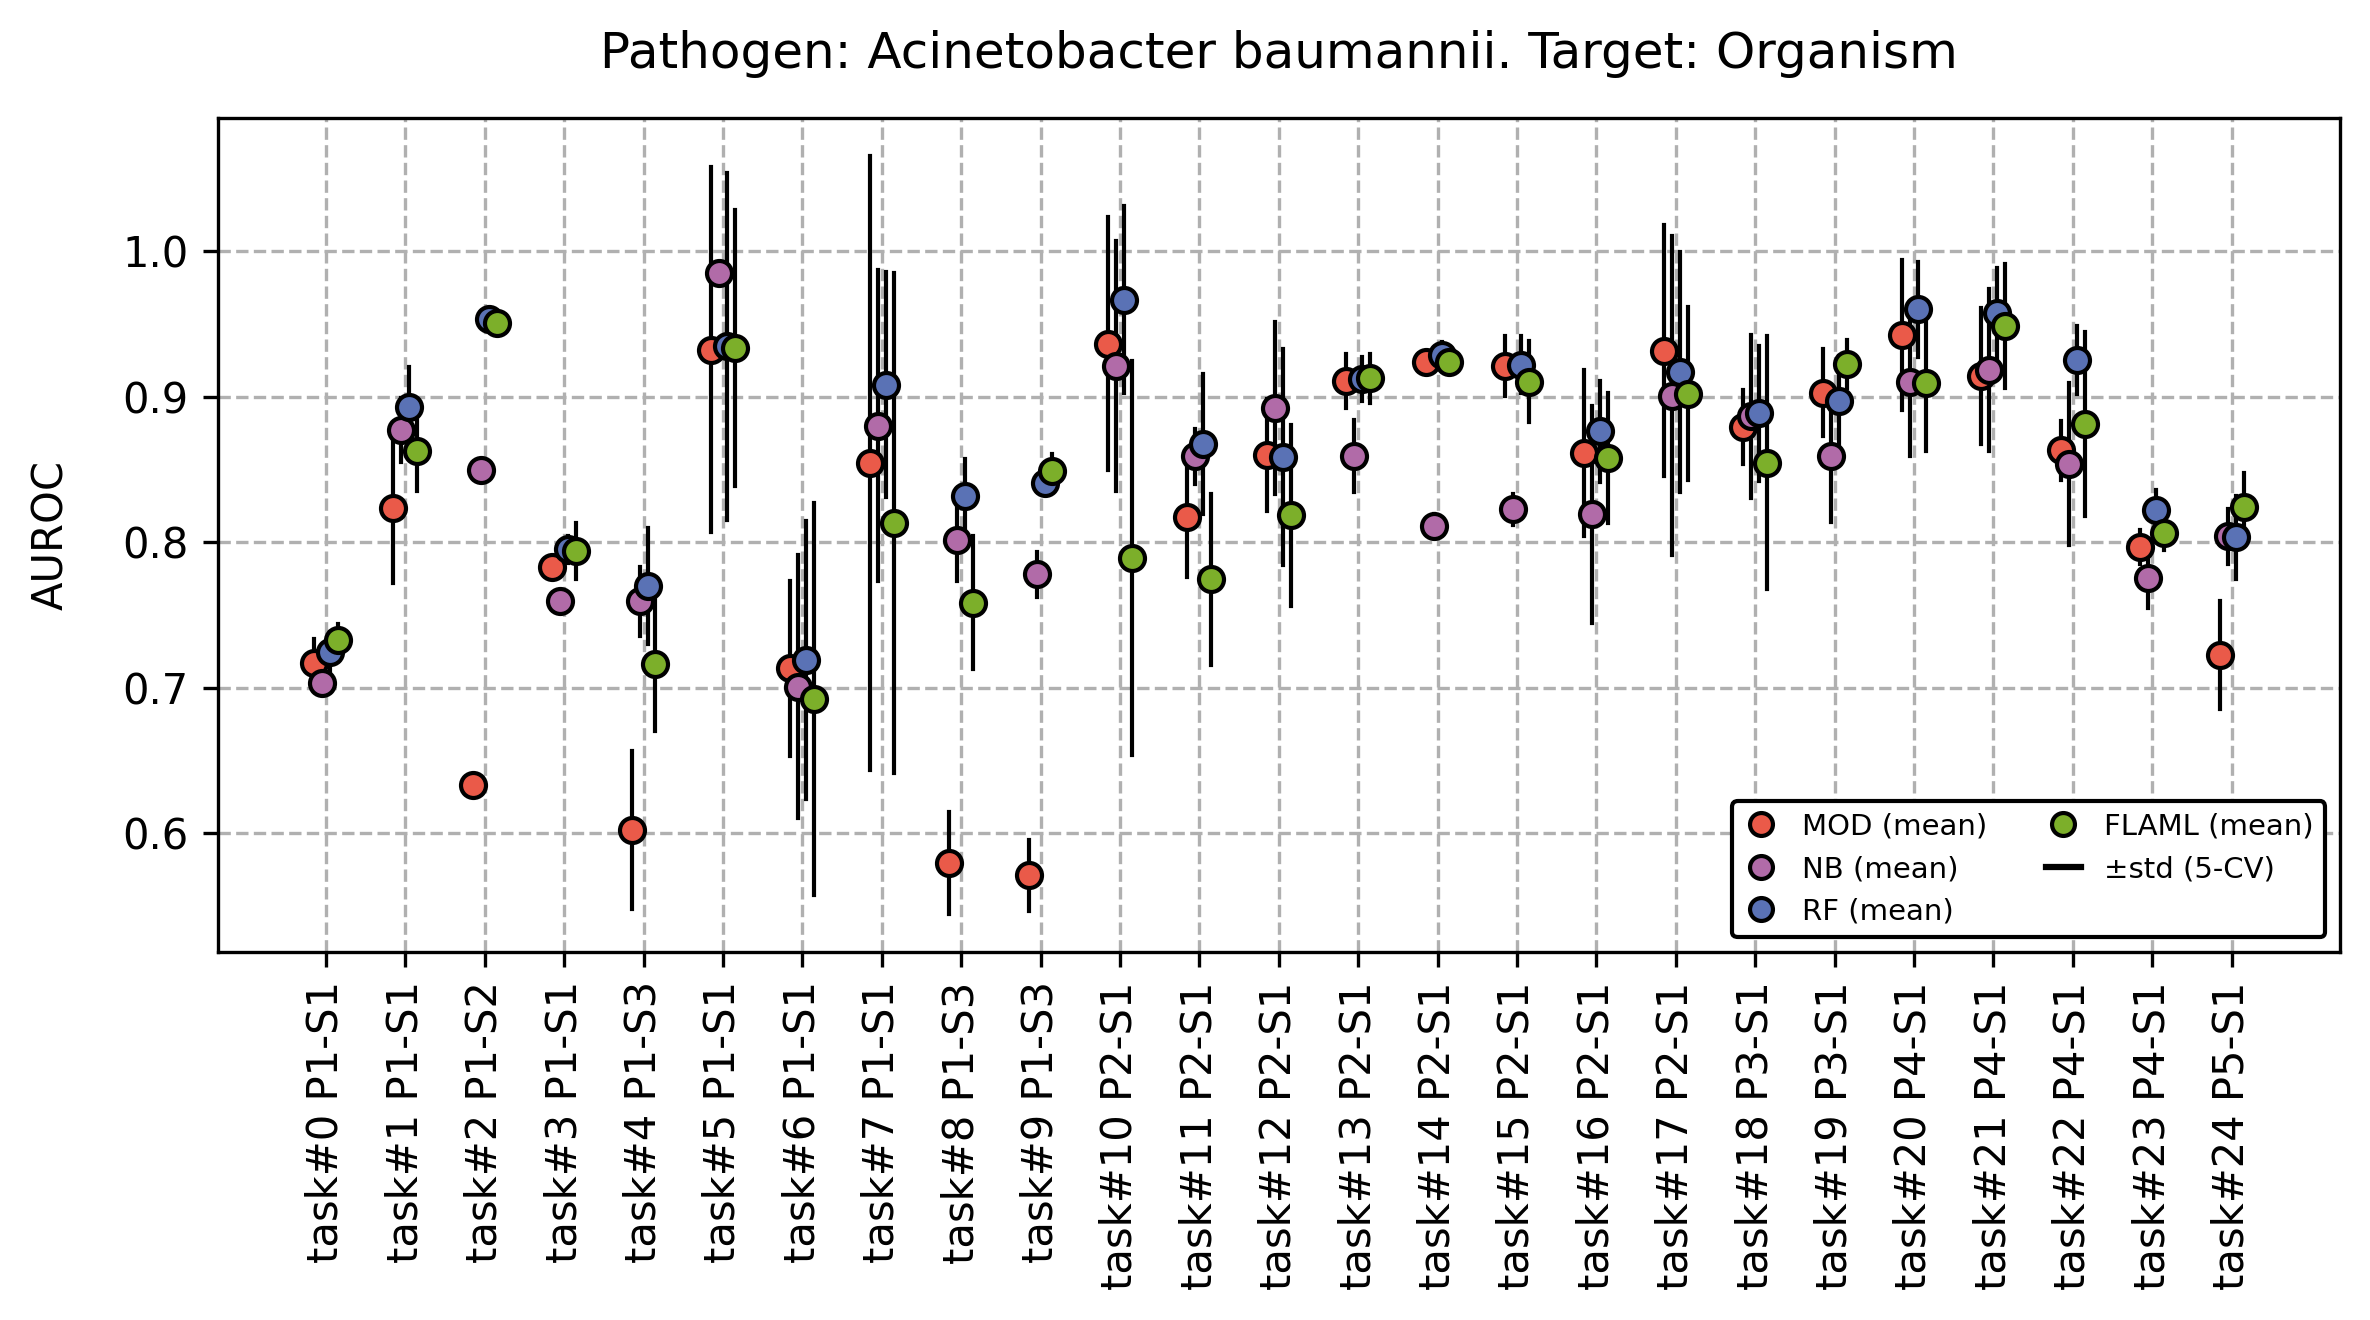

In [7]:
for pathogen in PATHOGENS:

    fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))

    # Get tasks and define x
    tasks = sorted(PATHOGEN_TO_RESULTS[pathogen])
    x = [i for i in range(len(tasks))]

    # Number of performances 
    m = 0.15

    # For each task
    for c1, task in enumerate(tasks):
        h = np.linspace(c1-m, c1+m, len(PATHOGEN_TO_RESULTS[pathogen][task]))
        for c2, perf in enumerate(PATHOGEN_TO_RESULTS[pathogen][task]):
            plt.scatter(h[c2], perf[0], zorder=3, ec='k', color=cc_colors[c2])
            plt.plot([h[c2], h[c2]], [perf[0]-perf[1], perf[0]+perf[1]], c='k', zorder=2, lw=1)

    dot_legend0 = plt.Line2D([], [], color=cc_colors[0], marker='o', linestyle='None', label='MOD (mean)', markeredgecolor='k', markersize=5.5)
    dot_legend1 = plt.Line2D([], [], color=cc_colors[1], marker='o', linestyle='None', label='NB (mean)', markeredgecolor='k', markersize=5.5)
    dot_legend2 = plt.Line2D([], [], color=cc_colors[2], marker='o', linestyle='None', label='RF (mean)', markeredgecolor='k', markersize=5.5)
    dot_legend3 = plt.Line2D([], [], color=cc_colors[3], marker='o', linestyle='None', label='FLAML (mean)', markeredgecolor='k', markersize=5.5)
    line_legend = plt.Line2D([], [], color='black', linestyle='-', label='±std (5-CV)')
    plt.legend(handles=[dot_legend0, dot_legend1, dot_legend2, dot_legend3, line_legend], 
               framealpha=1, edgecolor='k', handlelength=1.2, loc='best', fontsize=7, ncols=2)
    
    
    # Other stuff
    title = f"Pathogen: {pathogen_mappings[pathogen]}. Target: {target.capitalize()}"
    plt.ylabel("AUROC", labelpad=12)
    plt.title(title, size=12, pad=12)
    plt.xticks(x, [task_to_label(i, c) for c, i in enumerate(tasks)], rotation=90)
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.show()
    break


In [8]:
r = [PATHOGEN_TO_RESULTS['abaumannii'][i] for i in PATHOGEN_TO_RESULTS['abaumannii']]
r = [np.argmax([j[0] for j in i]) for i in r]

In [9]:
from collections import Counter
Counter(r)

Counter({2: 17, 3: 5, 1: 2, 0: 1})

In [10]:
len(r)

25